In [1]:
import os
import matplotlib.pyplot as plt
import Utilities.DataProcessing.data_import as dp_utils
import Utilities.Plotting.plot_distributions_spectra as plt_utils

In [2]:
if __name__ == "__main__":
    filename = "P2017_20_Solarhouse_2.csv"
    hybridcosim_path = os.environ.get("HYBRIDCOSIM_REPO_PATH", "../../../")
    path_to_dir = os.path.join(hybridcosim_path, "Data/AEE/")
    path_full = os.path.join(path_to_dir, filename)
    #datahouse = pd.read_hdf(path_full)

    # 01.01 15.03
    # 05.06 27.07
    # 29.12 07.03

    lab = ['T_P_oo', 'T_P_o', 'T_P_mo', 'T_P_mu', 'T_P_u', 'T_Holzkessel', 'T_Wohnraumofen',
           'T_Solar_VL', 'T_Solar_RL', 'Vd_Solar',
           'T_Nachheizung_VL', 'T_Nachheizung_RL', 'Vd_Nachheizung',
           'T_WW_VL', 'T_WW_RL', 'Vd_WW',
           'T_FBH_VL', 'T_FBH_RL', 'Vd_FBH',
           'Qel_Technik', 'Pel_Technik', 'Qel_Haushalt', 'Pel_Haushalt',
           'T_Raum', 'P_Holzkessel_calc', 'P_Ofen_calc', 'P_Recool']

    '''Filling the missing data'''
    df = dp_utils.import_data(path_full)

    '''Mass flow rate distribution'''

    print(df.columns)

Index(['Zeitraum', 'T_Aussen', 'R_Global', 'T_P_top', 'T_P_o', 'T_P_mo',
       'T_P_mu', 'T_P_u', 'T_Koll', 'p_Solar', 'p_Heizung', 'T_Solar_pri_VL',
       'T_Solar_pri_RL', 'T_Holzkessel', 'T_Wohnraumofen', 'T_WW_sek_RL',
       'T_WW_sek_VL', 'Pu_Sol', 'Pu_Nachheizung', 'Pu_FBH', 'VEN_Holzkessel',
       'VEN_Wohnraumofen', 'VEN_NH_RL', 'VEN_FBH_VL', 'Q_Solar', 'V_Solar',
       'T_Solar_VL', 'T_Solar_RL', 'dT_Solar', 'P_Solar', 'Vd_Solar',
       'Q_Nachheizung', 'V_Nachheizung', 'T_Nachheizung_VL',
       'T_Nachheizung_RL', 'dT_Nachheizung', 'P_Nachheizung', 'Vd_Nachheizung',
       'Q_WW', 'V_WW', 'T_WW_VL', 'T_WW_RL', 'dT_WW', 'P_WW', 'Vd_WW', 'Q_FBH',
       'V_FBH', 'T_FBH_VL', 'T_FBH_RL', 'dT_FBH', 'P_FBH', 'Vd_FBH',
       'Qel_Technik', 'Pel_Technik', 'Qel_Haushalt', 'Pel_Haushalt', 'T_Raum',
       'Ana2/3', 'Ana3/3', 'Ana4/3', 'Ana5/3', 'P_Holzkessel_calc',
       'P_Ofen_calc', 'T_FBH_VL_filt', 'T_FBH_VL_env', 'T_FBH_RL_filt',
       'T_FBH_RL_env', 'Vd_FBH_filt', 'Vd_

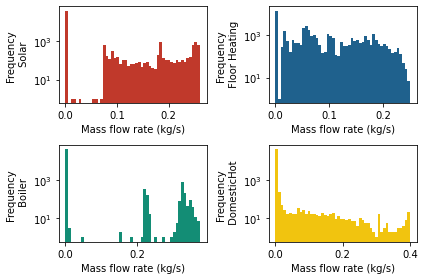

In [3]:
    data = df.copy()
    colorpalet = ['#7b241c', '#c0392b', '#e74c3c', '#1f618d', '#3498db', '#138d75', '#58d68d', '#f1c40f', '#dc7633',
                  '#5d6d7e']

    '''As the way it is '''
    fig1, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2)
    Vdsolar = df["Vd_Solar"]
    data_Vdsolar = Vdsolar.clip(lower=0) * 0.00028
    plt_utils.hist_50bins(ax1, data_Vdsolar, colorpalet[1],xlabel='Mass flow rate (kg/s)',ylabel='Frequency \n Solar')
    ax1.set_yscale('log')

    data_Vdfbh = data["Vd_FBH"].clip(lower=0) * 0.00028
    plt_utils.hist_50bins(ax2, data_Vdfbh, colorpalet[3], xlabel='Mass flow rate (kg/s)',ylabel='Frequency \n Floor Heating')
    ax2.set_yscale('log')

    data_VdNhz = data.get("Vd_Nachheizung").clip(lower=0) * 0.00028
    plt_utils.hist_50bins(ax3, data_VdNhz, colorpalet[5], xlabel='Mass flow rate (kg/s)', ylabel='Frequency \n Boiler')
    ax3.set_yscale('log')

    data_VdWW = data["Vd_WW"].clip(lower=0) * 0.00028
    plt_utils.hist_50bins(ax4, data_VdWW, colorpalet[7], xlabel='Mass flow rate (kg/s)', ylabel='Frequency \n DomesticHot')
    ax4.set_yscale('log')
    plt.tight_layout()
    plt.show()

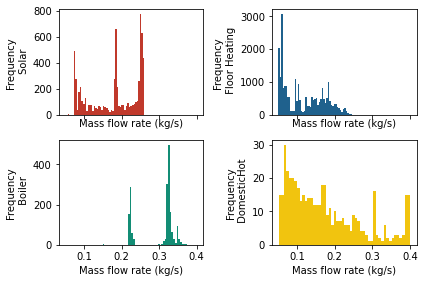

In [4]:
    '''Clipped '''
    fig2, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2, sharex=True)
    data_Vdsolar_clipped = df["Vd_Solar"].loc[(df["Vd_Solar"] * 0.00028 > 0.05)] * 0.00028
    plt_utils.hist_50bins(ax1, data_Vdsolar_clipped, colorpalet[1], xlabel='Mass flow rate (kg/s)', ylabel='Frequency \n Solar')
    # ax1.set_yscale('log')

    data_Vdfbh_clipped = data["Vd_FBH"].loc[(df["Vd_FBH"] * 0.00028 > 0.05)] * 0.00028
    plt_utils.hist_50bins(ax2, data_Vdfbh_clipped, colorpalet[3], xlabel='Mass flow rate (kg/s)', ylabel='Frequency \n Floor Heating')
    # ax2.set_yscale('log')

    data_VdNhz_clipped =data["Vd_Nachheizung"].loc[(df["Vd_Nachheizung"] * 0.00028 > 0.05)] * 0.00028
    plt_utils.hist_50bins(ax3, data_VdNhz_clipped, colorpalet[5], xlabel='Mass flow rate (kg/s)', ylabel='Frequency \n Boiler')
    # ax3.set_yscale('log')

    data_VdWW_clipped = data["Vd_WW"].loc[(df["Vd_WW"] * 0.00028 > 0.05)] * 0.00028
    plt_utils.hist_50bins(ax4, data_VdWW_clipped, colorpalet[7], xlabel='Mass flow rate (kg/s)', ylabel='Frequency \n DomesticHot')
    # ax4.set_xlim([0, 0.4])
    plt.tight_layout()
    plt.show()

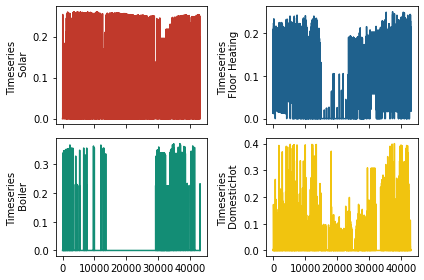

In [5]:
    '''Only mass flows'''
    fig3, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2, sharex=True)
    ax1.plot(data_Vdsolar, color=colorpalet[1])
    ax1.set_ylabel('Timeseries \n Solar')
    # ax1.set_yscale('log')

    ax2.plot(data_Vdfbh, color=colorpalet[3])
    ax2.set_ylabel('Timeseries \n Floor Heating')
    # ax2.set_yscale('log')

    ax3.plot(data_VdNhz, color=colorpalet[5])
    ax3.set_ylabel('Timeseries \n Boiler')
    # ax3.set_yscale('log')

    ax4.plot(data_VdWW, color=colorpalet[7])
    ax4.set_ylabel('Timeseries \n DomesticHot')
    plt.tight_layout()
    plt.show()